emmmmmmmmmmm...............
原本是想写logistic回归，写着写着。。就写歪了。。。。写成了线性回归。。。
这相当于是第一篇博客，所以想着把很多东西都纳入进去，也方便自己回顾一些基础内容。、
写博客还是很耗时间的。。感觉自己想写的东西还远远没完，时间来不及，作业交了再说！

### 什么是回归
目前我把它理解为：已知有输入 {$x_{1},x_{2},...,x_{n}$} 和线性函数 $f(x)$。根据函数 $f(x)$ 和输入 $X$ 可以得到输出 {$y_{1},y_{2},...,y_{n}$}。以上过程是已知输入和函数来得到相应的输出，现在我们的目标是通过输入 $X$ 和输出 $Y$ 来寻找和拟合 $f(x)$ 函数。

### 定义 $f(x)$
通常一个线性函数 $f(x)$ 可以写成 $f(x)$ = $a + bx + cx^{2} + dx^{3}+..$ 把它写成矩阵的形式就是 $f(x)$ = $WX + b$
从这个式子可知，一个线性函数由 $W$ 和 $b$ 这两个参数决定，不同的 $W$ 和不同的 $b$ 都会产生不同的线性函数。显然我们只要找到正确 $W$ 和 $b$ 就是找到了正确的 $f(x)$。

### 判断是否找到了正确的 $f(x)$
首先，我们不应该急于思考怎么找 $f(x)$ 而是先解决如何判断一个我们千方百计的找到的$f^{'}(x)$,就是正确的 $f(x)$ 的问题。
一个很显然的想法就是通过判断 输入 X 通过 $f^{‘}(x)$ 是否产生了与真实输出 $Y$ 一样的输出。于是把 $Y^{'}$ 与真实输出 $Y$ 的差异作为衡量 $f^{'}(x)$ 拟合 $f(x)$ 程度的标准。然后就是怎么量化两个数据间的差异，然后就出现了一个很常用的函数————均方误差，$\tfrac{1}{n}$$\sum_{n}(y_{i}-f(x_{i})^{'})^{2}$,这就是损失函数。

### 如何找正确的 $f(x)$
已知损失函数 $loss(w,b)$ $ = \tfrac{1}{n}$$\sum_{n}(y_{i}-
f(x_{i})^{'})^{2}$,$w$ 和 $b$ 是损失函数的参数，也是我们需要优化的参数。可以发现损失函数越小说明 $f^{'}(x)$ 越接近正确的 $f(x)$，那么我们的目标就是使损失函数最小，于是就出现了梯度下降方法。

在学习高数时，对一维函数 $g(x)$ 进行求导时，就是在 $y = g(x)$ 处画了条切线，切线的斜率就是导数，导数的正负表示这个 $g(x)$ 在点 $x$ 处是在增大还是减小。如果导数是正，我们只要减小 $x$ 就能减小 $y = g(x)$，反之，增大 $x$。总而言之，$x$的移动反向总是与梯度方向相反, $x^{new} = x^{old} - \tfrac{\Delta g(x))}{\Delta x^{old}}$,这就是梯度下降法，每次都通过移动 $x$ 达到函数下降，经过多次的迭代后可以达到一个好的效果。

现在回到对损失函数的讨论,在参数空间中任意的取一组参数 $(w^{'},b^{'})$,当然我们没有这个运气直接取到正确的 $(w,b)$，通常都会得到较坏的结果。然后把损失函数 $loss(w^{'},b^{'})$ 对 $w$ 和 $b$求偏导于是得到损失函数在(w^{'},b^{b})下对 $w$ 和 $b$ 两个方向的增减情况，现在我们的参数的二维的，于是我们能得到一个切平面,如果 $W$ 的维度不是一而是更高的，那么就是一个超平面。运用梯度下降思想，使 $w$ 每次都向使损失函数下降移动的方向 $w^{new} = w^{'} - \frac{\Delta loss(w,b))}{\Delta w^{'}}$,同理得到$b^{new} = b^{'} - \frac{\Delta loss(w,b))}{\Delta b^{'}}$。

### 往下降方向移动多少
现在我们已经有了一个似乎很好的方法来下降损失函数，下面考虑一个情况:
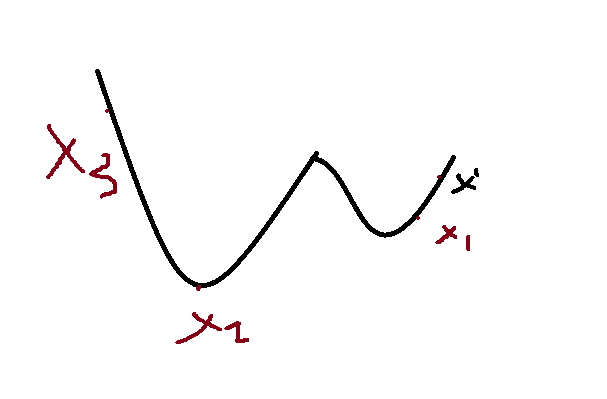

$x^{'}$ 是初始点，如果 $x$ 的移动距离只依赖于梯度的大小，$x^{'}$ 很可能就只移动到 $x_{1}$ ，$x_{1}$ 的梯度比 $x^{'}$ 的梯度小，移动的距离会更小，就算继续进行梯度下降，也无法到达最小值点 $x_{'}$，只能到达局部极小值点，梯度为0，损失不再减小。为了解决这个问题，不妨人为的设计一个参数来控制移动距离的大小，这就是学习率 $\eta$，用它来放大或缩小移动距离。于是梯度更新变成了 $x^{new} = x^{old} - \eta  \frac{\Delta g^{'}(x))}{\Delta x^{old}}$。
引入学习率 $\eta$ 后，又会产生一个问题， $\eta$ 应该多大，如果 $\eta$ 过大会导致 ${x^{'}}$ 移动到 ${x_{3}}$，然后 ${x_{3}}$ 又会移动到${x^{'}}$那边去，就这样两边旋转跳跃~所以设计如何设计一个好的学习率也是一个很重要的问题。